## Employee Attrition Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df = pd.read_csv("HR_capstone_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
print(df['Department'].unique())
print(df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [7]:
df.rename(columns={'left': 'Attrition'}, inplace=True)

In [8]:
print(df.columns) 

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'Attrition', 'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


## 1. How imbalanced is Attrition overall?

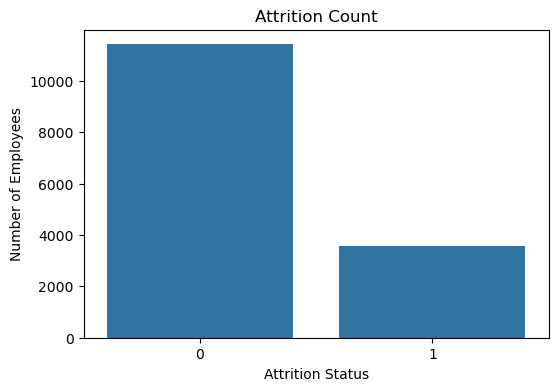

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition")
plt.title("Attrition Count")
plt.xlabel("Attrition Status")
plt.ylabel("Number of Employees")
plt.show()


## 2.Which departments/roles have the highest attrition rate?

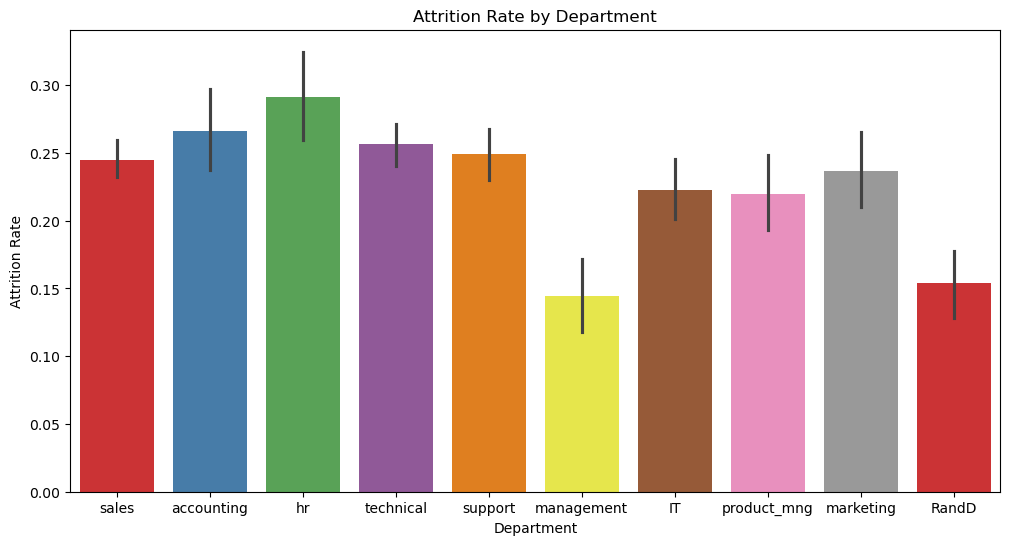

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Department", y="Attrition",palette="Set1",legend = False)
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.show()

## 3. Distribution of Attrition across Departments

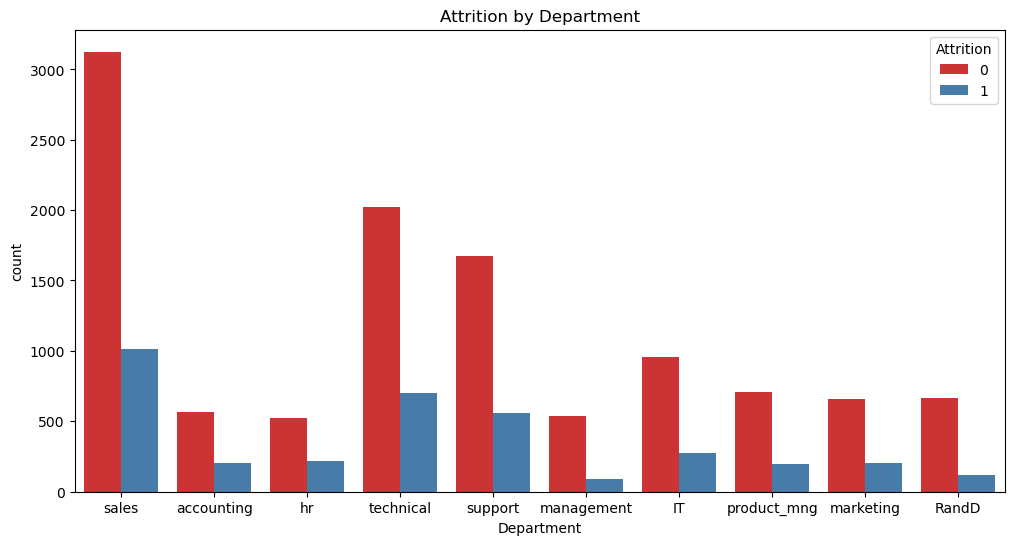

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Department", hue="Attrition", palette="Set1")
plt.title("Attrition by Department")
plt.show()

## 4. Satisfaction Level

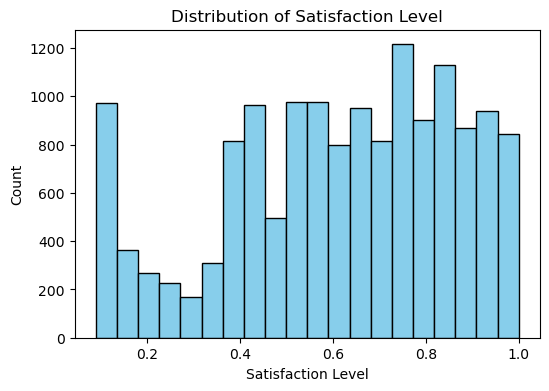

In [12]:
plt.figure(figsize=(6,4))
plt.hist(df['satisfaction_level'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

## 5. Average Monthly Hours by Time Spent in Company

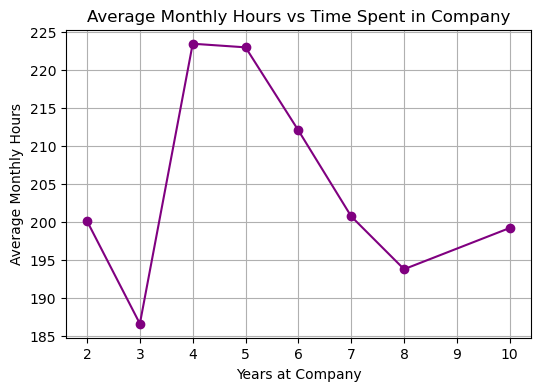

In [13]:
avg_hours_by_years = df.groupby('time_spend_company')['average_montly_hours'].mean()
plt.figure(figsize=(6,4))
plt.plot(avg_hours_by_years.index, avg_hours_by_years.values, marker='o', linestyle='-', color='purple')
plt.title("Average Monthly Hours vs Time Spent in Company")
plt.xlabel("Years at Company")
plt.ylabel("Average Monthly Hours")
plt.grid(True)
plt.show()

## 6.  Average Monthly Hours by Attrition

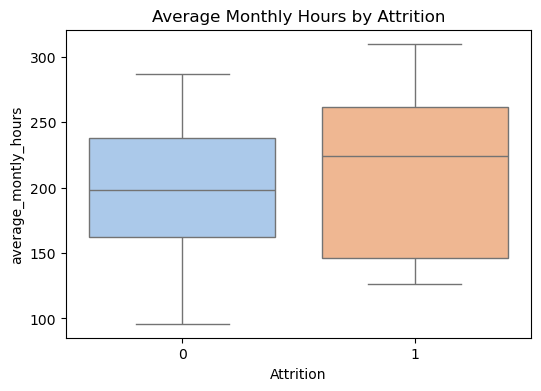

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='average_montly_hours', palette='pastel')
plt.title("Average Monthly Hours by Attrition")
plt.show()

## 7. Correlation Heatmap

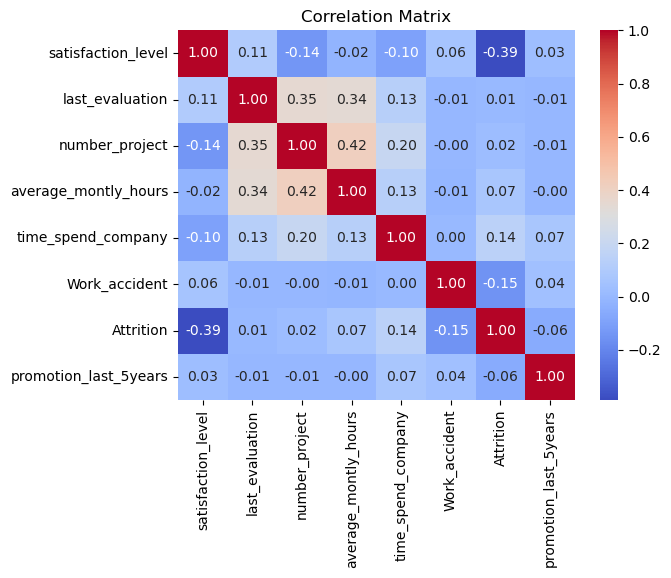

In [15]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 8. Attrition by Salary Level

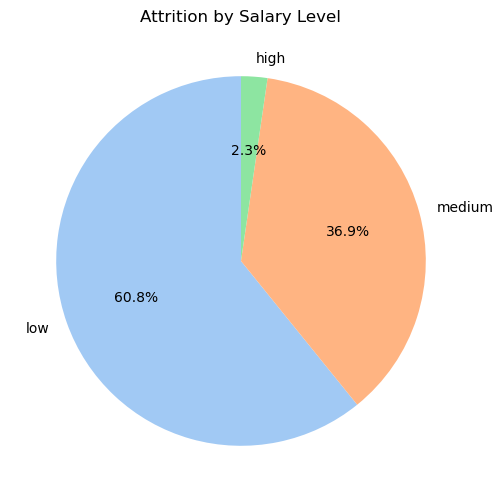

In [16]:
salary = df[df['Attrition'] == 1]['salary'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(salary, labels=salary.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Attrition by Salary Level")
plt.show()


## 9. Satisfaction Level vs Average Monthly Hours

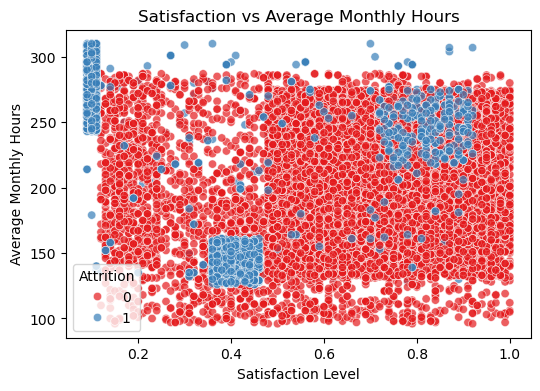

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='satisfaction_level', y='average_montly_hours', hue='Attrition', palette='Set1', alpha=0.7)
plt.title("Satisfaction vs Average Monthly Hours")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.show()


## 10. Attrition by Promotion Status

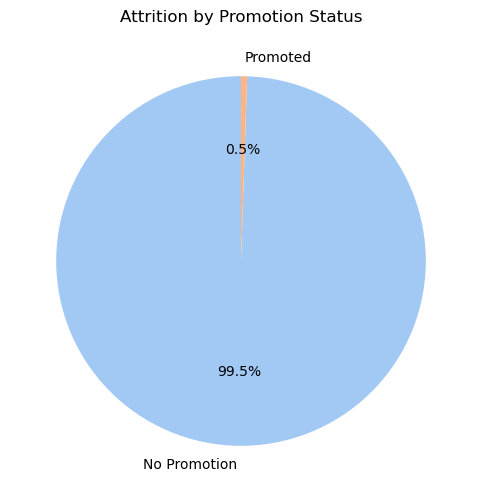

In [18]:
promotion_attrition = df[df['Attrition'] == 1]['promotion_last_5years'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(promotion_attrition, 
        labels=['No Promotion', 'Promoted'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("pastel"))
plt.title("Attrition by Promotion Status")
plt.show()